In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 類別資料：job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y
# 連續資料：age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed 
df = pd.read_csv("bank-additional-full.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe(include=['O']) # 類別是 object 的統計有幾筆

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### job

In [9]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
# 把類似的工作結合在一起
df["job"] = df["job"].replace(["management", "admin."], "white-collar")
df["job"] = df["job"].replace(["services","housemaid"], "pink-collar")
df["job"] = df["job"].replace(["retired", "student", "unemployed", "unknown"], "other")
df.job.value_counts()

white-collar     13346
blue-collar       9254
technician        6743
pink-collar       5029
other             3939
entrepreneur      1456
self-employed     1421
Name: job, dtype: int64

### marital

In [11]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

### education

In [12]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

### default

In [13]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### housing

In [14]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

### loan

In [15]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

### contact

In [16]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [17]:
# 刪掉 "contact" 這個變數，因為每個觀察值都有被聯繫上
df = df.drop("contact",axis=1)
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,pink-collar,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,pink-collar,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,pink-collar,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,pink-collar,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### month

In [18]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

### day_of_week

In [19]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

### poutcome

In [20]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

### y

In [21]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [22]:
df["y"].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

### pdays

In [23]:
df.pdays.value_counts()
# 其中 "999" 表示之前未曾聯繫過

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [24]:
pdays = df["pdays"]
pdays

0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41188, dtype: int64

In [25]:
pdays = pdays.replace([3,6,4,9,2,7,12,10,5,13,11,1,15,14,8,0,16,17,18,19,22,21,26,20,25,27],1)
pdays = pdays.replace(999,0)
pdays

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: pdays, Length: 41188, dtype: int64

In [26]:
# 0 表示之前未接觸過
# 1 表示之前接觸過
pdays.value_counts()

0    39673
1     1515
Name: pdays, dtype: int64

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,pink-collar,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,pink-collar,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,pink-collar,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,pink-collar,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df = df.drop(["pdays"], axis = 1)

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,pink-collar,married,basic.4y,no,no,no,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,pink-collar,married,high.school,unknown,no,no,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,pink-collar,married,high.school,no,yes,no,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic.6y,no,no,no,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,pink-collar,married,high.school,no,no,yes,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df = pd.concat([df,pdays],axis=1)

In [31]:
# 將類別資料以虛擬變數表示
# 本來若有 k 個 level，drop_first=True，會只剩下 k-1 個 level，避免共線性問題
df_with_dummy = pd.get_dummies(df,drop_first = True)
df_with_dummy.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
df_with_dummy.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

### EDA

In [33]:
df_with_dummy.shape

(41188, 48)

In [34]:
df_with_dummy.isnull().sum()

age                              0
duration                         0
campaign                         0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
pdays                            0
job_entrepreneur                 0
job_other                        0
job_pink-collar                  0
job_self-employed                0
job_technician                   0
job_white-collar                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
default_unknown                  0
default_yes                      0
housing_unknown     

In [35]:
df_with_dummy.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


In [36]:
df_with_dummy.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.036783,...,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335,0.112654
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.188230,...,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
print(df_with_dummy.nunique())

age                                78
duration                         1544
campaign                           42
previous                            8
emp.var.rate                       10
cons.price.idx                     26
cons.conf.idx                      26
euribor3m                         316
nr.employed                        11
pdays                               2
job_entrepreneur                    2
job_other                           2
job_pink-collar                     2
job_self-employed                   2
job_technician                      2
job_white-collar                    2
marital_married                     2
marital_single                      2
marital_unknown                     2
education_basic.6y                  2
education_basic.9y                  2
education_high.school               2
education_illiterate                2
education_professional.course       2
education_university.degree         2
education_unknown                   2
default_unkn

C:\Users\Ken Huang\anaconda3\envs\Python3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ken Huang\anaconda3\envs\Python3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ken Huang\anaconda3\envs\Python3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

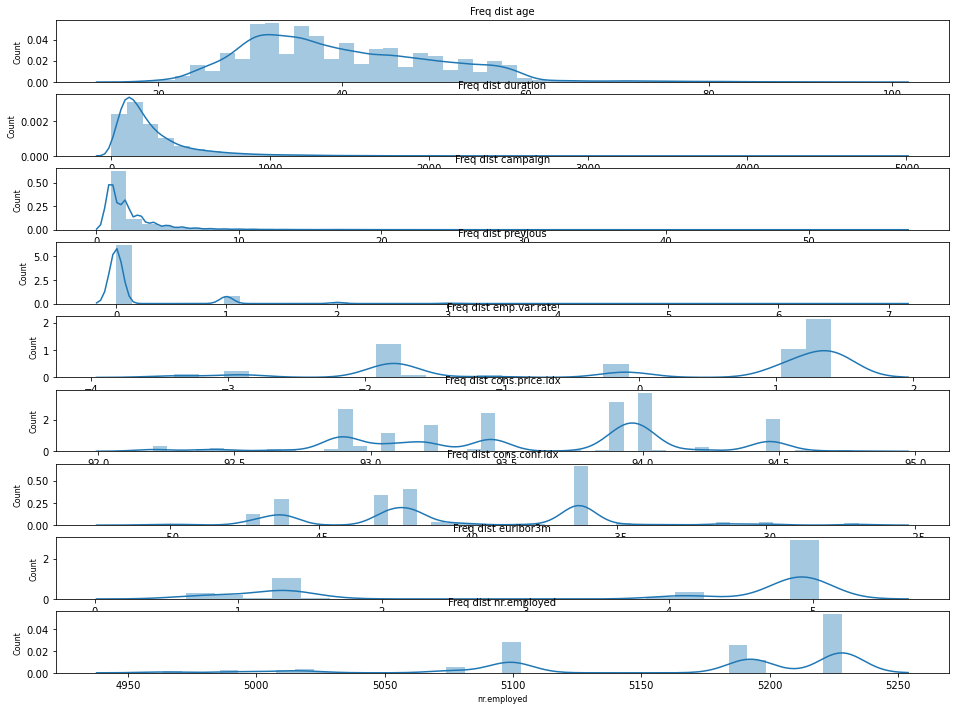

In [38]:
col_names = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.distplot(df[col_val], hist = True, ax = ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize = 8)
    ax[i].set_ylabel('Count', fontsize = 8)
plt.show()

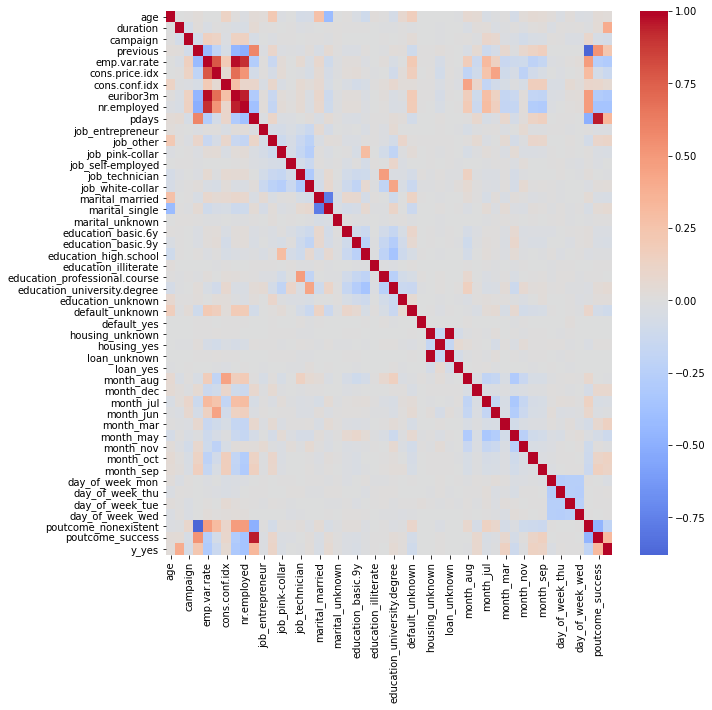

In [39]:
# 依據兩兩相關係數大小，畫出heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_with_dummy.corr(),annot = False , center = 0.0 , cmap = "coolwarm")
plt.show()

### Logistic regression

In [40]:
# 把所有自變數放在 X ( 去除 y_yes )
X = df_with_dummy.drop(["y_yes"],axis = 1)

In [41]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [42]:
# 從 X 中把連續型資料抽出來進行標準化
df_conti = X.iloc[:,0:9]

In [43]:
df_conti.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [45]:
# 將連續型資料標準化
# 去單位、提升收斂速度
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_conti)
scaled_df = pd.DataFrame(scaled_df , columns = df_conti.columns)

In [46]:
scaled_df

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [47]:
# 把 X 中標準化前的資料刪除
X = X.drop(['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],axis = 1)

In [48]:
X.columns

Index(['pdays', 'job_entrepreneur', 'job_other', 'job_pink-collar',
       'job_self-employed', 'job_technician', 'job_white-collar',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [49]:
clean_df = pd.concat([scaled_df, X], axis = 1)

In [50]:
clean_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0


In [51]:
clean_df.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [52]:
y = df_with_dummy["y_yes"]
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8

In [53]:
# 將自變數、應變數的資料拆成訓練資料及測試資料，比例為 8:2
X_train, X_test, y_train, y_test = train_test_split(clean_df, y, test_size = 0.2, random_state = 1)

In [54]:
from imblearn.over_sampling import ADASYN
# 對訓練資料集作平衡處理
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

In [55]:
X_resampled

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.961898,-0.645200,-0.565922,-0.349494,-1.197935,-1.179380,-1.231034,-1.338939,-0.940281,0,...,1,0,0,0,1,0,0,0,1,0
1,1.724952,-0.560349,0.517118,-0.349494,-1.197935,-0.357036,1.232158,-1.721774,-2.191481,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.769980,1.410523,-0.565922,-0.349494,0.839061,0.591424,-0.474791,0.773575,0.845170,0,...,0,0,0,0,0,1,0,0,1,0
3,-1.345734,-0.166946,-0.565922,1.671136,-1.898153,-2.374889,1.966794,-1.592625,-1.257233,0,...,0,0,0,0,0,0,1,0,0,0
4,0.765363,-0.710767,-0.565922,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58230,-0.853035,4.842639,-0.565922,1.671136,-1.197935,-1.179380,-1.231034,-1.339637,-0.940281,0,...,1,0,0,0,0,0,0,0,0,0
58231,-0.718968,4.837250,-0.565922,1.671136,-1.197935,-1.179380,-1.231034,-1.346886,-0.940281,0,...,1,0,0,0,0,0,0,0,0,0
58232,-0.728583,4.837637,-0.565922,1.671136,-1.197935,-1.179380,-1.231034,-1.346366,-0.940281,0,...,1,0,0,0,0,0,0,0,0,0
58233,-0.701661,4.778047,-0.461939,1.671136,-1.197935,-1.179380,-1.231034,-1.351033,-0.940281,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
y_resampled

0        0
1        0
2        0
3        1
4        0
        ..
58230    1
58231    1
58232    1
58233    1
58234    1
Name: y_yes, Length: 58235, dtype: uint8

In [57]:
# 重抽樣前的類別比例
print(y_train.value_counts()/len(y_train))
print(y_train.value_counts())

0    0.88783
1    0.11217
Name: y_yes, dtype: float64
0    29254
1     3696
Name: y_yes, dtype: int64


In [58]:
# 重抽樣後的類別比例
print(pd.Series(y_resampled).value_counts()/len(y_resampled))
print(pd.Series(y_resampled).value_counts())

0    0.502344
1    0.497656
Name: y_yes, dtype: float64
0    29254
1    28981
Name: y_yes, dtype: int64


In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(X_resampled, y_resampled)

C:\Users\Ken Huang\anaconda3\envs\Python3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
# 定義計算 Recall. Accuracy. F1 的函數 
def Measures(conf_matrix):
    
    TP, FP, FN, TN = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    # F1 score
    F1 = (2*TP)/(2*TP+FN+FP)
    
    return TPR, ACC, F1

Recall of logistic regression classifier on test set: 0.96
Accuracy of logistic regression classifier on test set: 0.86
F1 Score of logistic regression classifier on test set: 0.92


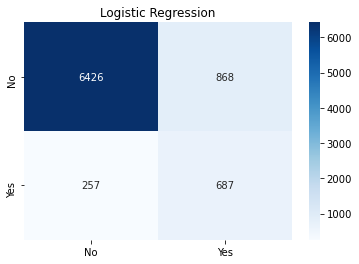

In [61]:
from sklearn.metrics import confusion_matrix
log_ConfMatrix = confusion_matrix(y_test, logreg.predict(X_test))
plt.title("Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(log_ConfMatrix, annot=True, cmap="Blues", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])
recall, acc, F1 = Measures(log_ConfMatrix)
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc))
print('F1 Score of logistic regression classifier on test set: {:.2f}'.format(F1))

In [62]:
# K Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_resampled, y_resampled)

In [63]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(
criterion = 'gini',
max_depth = 5,
min_samples_leaf=1,
max_features="auto",
random_state=0)
DecisionTree = DecisionTree.fit(X_resampled, y_resampled)

In [64]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTree,out_file="tree.dot",feature_names=['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays','job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed','job_technician', 'job_white-collar', 'marital_married','marital_single', 'marital_unknown', 'education_basic.6y','education_basic.9y', 'education_high.school', 'education_illiterate','education_professional.course', 'education_university.degree','education_unknown', 'default_unknown', 'default_yes','housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes','month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar','month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon','day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed','poutcome_nonexistent', 'poutcome_success'])

In [65]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(
n_estimators=10, #決策樹的數量
criterion="gini",
max_features="auto", #如何選取 features
max_depth=5,
min_samples_split=2,
min_samples_leaf=1)
RandomForest = RandomForest.fit(X_resampled, y_resampled)

In [66]:
estimator = RandomForest.estimators_[3] #從中挑選一支
export_graphviz(estimator, out_file="forest.dot",  
                filled=True, rounded=True,
                special_characters=True,feature_names =['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays','job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed','job_technician', 'job_white-collar', 'marital_married','marital_single', 'marital_unknown', 'education_basic.6y','education_basic.9y', 'education_high.school', 'education_illiterate','education_professional.course', 'education_university.degree','education_unknown', 'default_unknown', 'default_yes','housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes','month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar','month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon','day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed','poutcome_nonexistent', 'poutcome_success'])

In [67]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(kernel="linear", probability=True)
svm = svm.fit(X_resampled, y_resampled)

In [68]:
# PCA
from sklearn.decomposition import PCA
# 自變數共有 47 個，components 設為 47
covar_matrix = PCA(n_components = 47)

# 計算 47 個特徵根分別可以解釋的變異程度
covar_matrix.fit(clean_df)
variance = covar_matrix.explained_variance_ratio_
variance

array([2.96017428e-01, 9.35333033e-02, 8.15000052e-02, 7.48121370e-02,
       7.03761432e-02, 6.80340987e-02, 3.78431304e-02, 2.85764205e-02,
       2.40404535e-02, 2.00820322e-02, 1.91651311e-02, 1.80579339e-02,
       1.60361960e-02, 1.53755943e-02, 1.52014729e-02, 1.38178427e-02,
       1.15491206e-02, 1.09663213e-02, 1.00296023e-02, 9.86975919e-03,
       8.60470017e-03, 7.20443291e-03, 6.60996256e-03, 5.79852971e-03,
       4.83718622e-03, 3.69852959e-03, 3.53718556e-03, 3.48401744e-03,
       3.43210380e-03, 3.17230204e-03, 2.93903174e-03, 2.67893918e-03,
       1.71169216e-03, 1.46094756e-03, 1.38600754e-03, 1.21807900e-03,
       9.82451429e-04, 8.37835839e-04, 5.27570278e-04, 3.08379364e-04,
       2.78391605e-04, 1.46971385e-04, 1.15718273e-04, 1.05701243e-04,
       3.35851001e-05, 5.62198760e-06, 1.23558359e-33])

In [69]:
# 加總計算每多一個特徵根，可以解釋的變異程度為多少 ( 以百分比表示 )
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var

array([ 29.6,  39. ,  47.2,  54.7,  61.7,  68.5,  72.3,  75.2,  77.6,
        79.6,  81.5,  83.3,  84.9,  86.4,  87.9,  89.3,  90.5,  91.6,
        92.6,  93.6,  94.5,  95.2,  95.9,  96.5,  97. ,  97.4,  97.8,
        98.1,  98.4,  98.7,  99. ,  99.3,  99.5,  99.6,  99.7,  99.8,
        99.9, 100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1])

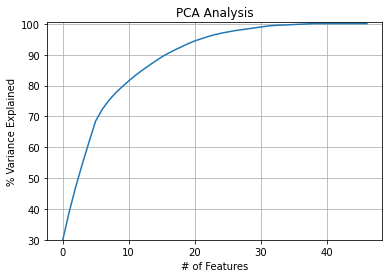

In [70]:
# 以特徵根的個數及該特徵根個數所對應到的可解釋變異程度為 x , y 軸，畫出折線圖
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.grid()
plt.plot(var)

In [71]:
# 將 47 維的數據，透過 PCA 垂直投影，降為 17 維資料
new_pca = PCA(n_components = 17)
new_pca_ = new_pca.fit_transform(clean_df)
new_pca.explained_variance_ratio_

array([0.29601743, 0.0935333 , 0.08150001, 0.07481214, 0.07037614,
       0.0680341 , 0.03784313, 0.02857642, 0.02404045, 0.02008203,
       0.01916513, 0.01805793, 0.01603613, 0.01537557, 0.01520146,
       0.01381782, 0.01154894])

In [72]:
# 列出垂直投影到 17 維空間後的資料所代表的座標
new_principal = pd.DataFrame(new_pca_, columns = ["PC_1", "PC_2", "PC_3", "PC_4", "PC_5", "PC_6", "PC_7", "PC_8", "PC_9", "PC_10", "PC_11", "PC_12", "PC_13", "PC_14", "PC_15", "PC_16", "PC_17"])
new_principal.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17
0,-1.268530,1.707703,0.222111,0.194503,-0.432366,-0.518952,-0.667519,-0.326800,0.023694,-0.572080,0.251759,-0.154653,0.585936,-0.695423,0.027725,-0.237807,0.238267
1,-1.319220,1.762267,-0.125006,0.074008,-0.503044,-0.765563,-0.769238,-0.543935,0.167057,-1.132743,-0.002880,0.194970,0.523339,-0.805207,0.028291,-0.158399,-0.104466
2,-1.240531,0.360533,0.452664,-0.648455,0.249231,-0.269955,-0.703204,-0.801357,-0.191556,-0.539792,-0.883559,0.359712,0.560399,-0.641351,-0.025976,-0.411102,0.120855
3,-1.258513,0.610972,0.178612,-0.706825,0.166930,-0.400360,-0.615814,-0.056957,-0.781960,-0.528364,0.236561,-0.205471,0.585499,-0.669823,-0.014737,-0.251969,0.302630
4,-1.260224,1.657243,0.364586,0.279598,-0.411243,-0.446925,-0.693865,-0.429342,0.124074,-1.026465,-0.064032,0.329200,0.558001,-0.702588,0.036661,-0.549600,0.254881


In [73]:
new_principal.shape

(41188, 17)

In [74]:
# 將自變數、應變數的資料拆成訓練資料及測試資料，比例為 8:2
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(new_principal, y, test_size = 0.2, random_state = 1)

In [75]:
#NN
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [76]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units = 32,activation="relu",input_shape=(X_train_pca.shape[1],)))
model.add(layers.Dense(units = 64,activation="relu"))
model.add(layers.Dense(units=1,activation="sigmoid"))

model.compile(optimizer="rmsprop" ,loss="binary_crossentropy",metrics=["accuracy",f1_m,recall_m])

# 當一個完整的資料集通過神經網路一次並且返回了一次，這個過程稱為一個 epoch
# 在不能將資料一次性通過神經網路的時候，就需要將資料集分成幾個 batch

history = model.fit(X_train_pca,y_train_pca,epochs= 12, batch_size= 100)

Epoch 1/12
32950/32950 [==============================] - 0s 13us/step - loss: 0.2369 - accuracy: 0.9026 - f1_m: 0.3991 - recall_m: 0.3327
Epoch 2/12
32950/32950 [==============================] - 0s 7us/step - loss: 0.1956 - accuracy: 0.9096 - f1_m: 0.5088 - recall_m: 0.4449
Epoch 3/12
32950/32950 [==============================] - 0s 8us/step - loss: 0.1915 - accuracy: 0.9104 - f1_m: 0.5184 - recall_m: 0.4577
Epoch 4/12
32950/32950 [==============================] - 0s 8us/step - loss: 0.1894 - accuracy: 0.9111 - f1_m: 0.5235 - recall_m: 0.4673
Epoch 5/12
32950/32950 [==============================] - 0s 8us/step - loss: 0.1880 - accuracy: 0.9109 - f1_m: 0.5288 - recall_m: 0.4749
Epoch 6/12
32950/32950 [==============================] - 0s 8us/step - loss: 0.1865 - accuracy: 0.9105 - f1_m: 0.5293 - recall_m: 0.4772
Epoch 7/12
32950/32950 [==============================] - 0s 8us/step - loss: 0.1856 - accuracy: 0.9121 - f1_m: 0.5394 - recall_m: 0.4890
Epoch 8/12
32950/32950 [=========

Recall of logistic regression classifier on train set: 0.91
Accuracy of logistic regression classifier on train set: 0.90
F1 Score of logistic regression classifier on train set: 0.90
-------------------------------------------------------------------------
Recall of KNN on train set: 1.00
Accuracy of KNN on train set: 0.93
F1 Score of KNN on train set: 0.93
-------------------------------------------------------------------------
Recall of decision tree classifier on train set: 0.87
Accuracy of decision tree classifier on train set: 0.84
F1 Score of decision tree classifier on train set: 0.83
-------------------------------------------------------------------------
Recall of random forest classifier on train set: 0.90
Accuracy of random forest classifier on train set: 0.86
F1 Score of random forest classifier on train set: 0.85
-------------------------------------------------------------------------
Recall of svm classifier on train set: 0.93
Accuracy of svm classifier on train set: 

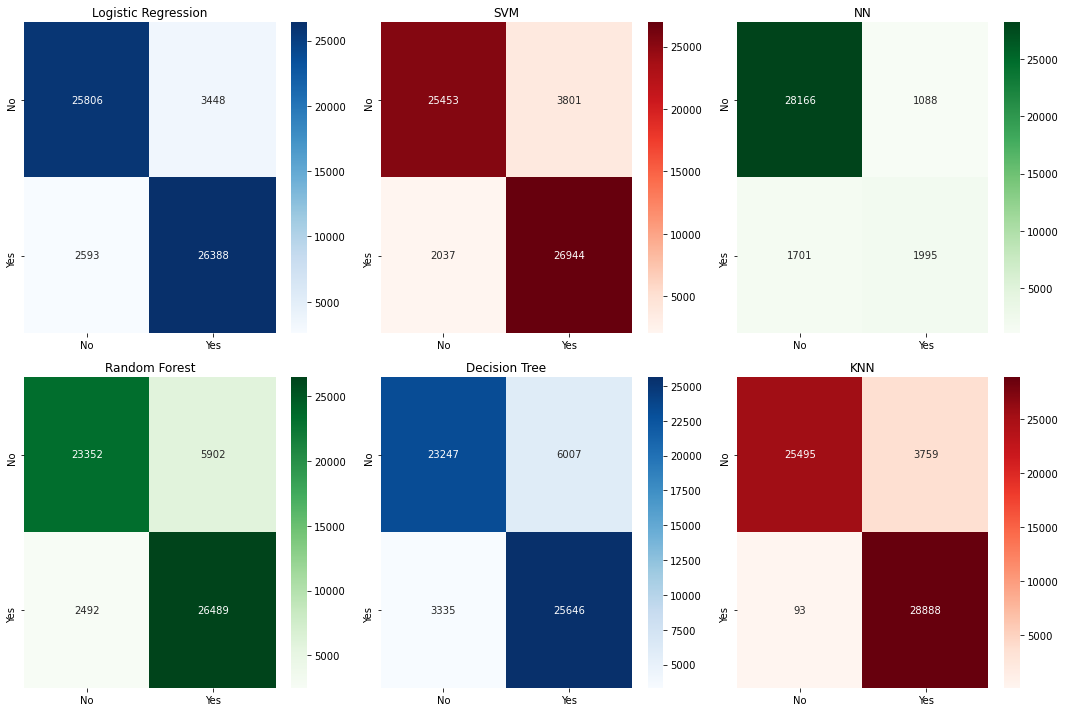

In [77]:
plt.figure(figsize=(15,10))

# 1. Logistic Regression
log_ConfMatrix = confusion_matrix(y_resampled, logreg.predict(X_resampled))
plt.subplot(2, 3, 1)
plt.title("Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(log_ConfMatrix, annot=True, cmap="Blues", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(log_ConfMatrix)
print('Recall of logistic regression classifier on train set: {:.2f}'.format(recall))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(acc))
print('F1 Score of logistic regression classifier on train set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 2. K Nearest Neighbor
knn_ConfMatrix = confusion_matrix(y_resampled, KNN.predict(X_resampled))
plt.subplot(2, 3, 6)
plt.title("KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(knn_ConfMatrix, annot=True, cmap="Reds", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(knn_ConfMatrix)
print('Recall of KNN on train set: {:.2f}'.format(recall))
print('Accuracy of KNN on train set: {:.2f}'.format(acc))
print('F1 Score of KNN on train set: {:.2f}'.format(F1))


print('-------------------------------------------------------------------------')
# 3. Decision Tree
dt_ConfMatrix = confusion_matrix(y_resampled, DecisionTree.predict(X_resampled))
plt.subplot(2, 3, 5)
plt.title("Decision Tree")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(dt_ConfMatrix, annot=True, cmap="Blues", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(dt_ConfMatrix)
print('Recall of decision tree classifier on train set: {:.2f}'.format(recall))
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(acc))
print('F1 Score of decision tree classifier on train set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 4. Random Forest
rf_ConfMatrix = confusion_matrix(y_resampled, RandomForest.predict(X_resampled))
plt.subplot(2, 3, 4)
plt.title("Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(rf_ConfMatrix, annot=True, cmap="Greens", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(rf_ConfMatrix)
print('Recall of random forest classifier on train set: {:.2f}'.format(recall))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(acc))
print('F1 Score of random forest classifier on train set: {:.2f}'.format(F1))


print('-------------------------------------------------------------------------')
# 5. SVM (Support Vector Mechine)
svm_ConfMatrix = confusion_matrix(y_resampled, svm.predict(X_resampled))
plt.subplot(2, 3, 2)
plt.title("SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(svm_ConfMatrix, annot=True, cmap="Reds", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(svm_ConfMatrix)
print('Recall of svm classifier on train set: {:.2f}'.format(recall))
print('Accuracy of svm classifier on train set: {:.2f}'.format(acc))
print('F1 Score of svm classifier on train set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 6. NN
nn_ConfMatrix = confusion_matrix(y_train_pca, model.predict_classes(X_train_pca))
plt.subplot(2, 3, 3)
plt.title("NN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(nn_ConfMatrix, annot=True, cmap="Greens", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(nn_ConfMatrix)
print('Recall of NN classifier on train set: {:.2f}'.format(recall))
print('Accuracy of NN classifier on train set: {:.2f}'.format(acc))
print('F1 Score of NN classifier on train set: {:.2f}'.format(F1))


plt.tight_layout()

Recall of logistic regression classifier on test set: 0.96
Accuracy of logistic regression classifier on test set: 0.86
F1 Score of logistic regression classifier on test set: 0.92
-------------------------------------------------------------------------
Recall of KNN on test set: 0.98
Accuracy of KNN on test set: 0.84
F1 Score of KNN on test set: 0.90
-------------------------------------------------------------------------
Recall of decision tree classifier on test set: 0.98
Accuracy of decision tree classifier on test set: 0.80
F1 Score of decision tree classifier on test set: 0.87
-------------------------------------------------------------------------
Recall of random forest classifier on test set: 0.98
Accuracy of random forest classifier on test set: 0.80
F1 Score of random forest classifier on test set: 0.88
-------------------------------------------------------------------------
Recall of svm classifier on test set: 0.97
Accuracy of svm classifier on test set: 0.86
F1 Score 

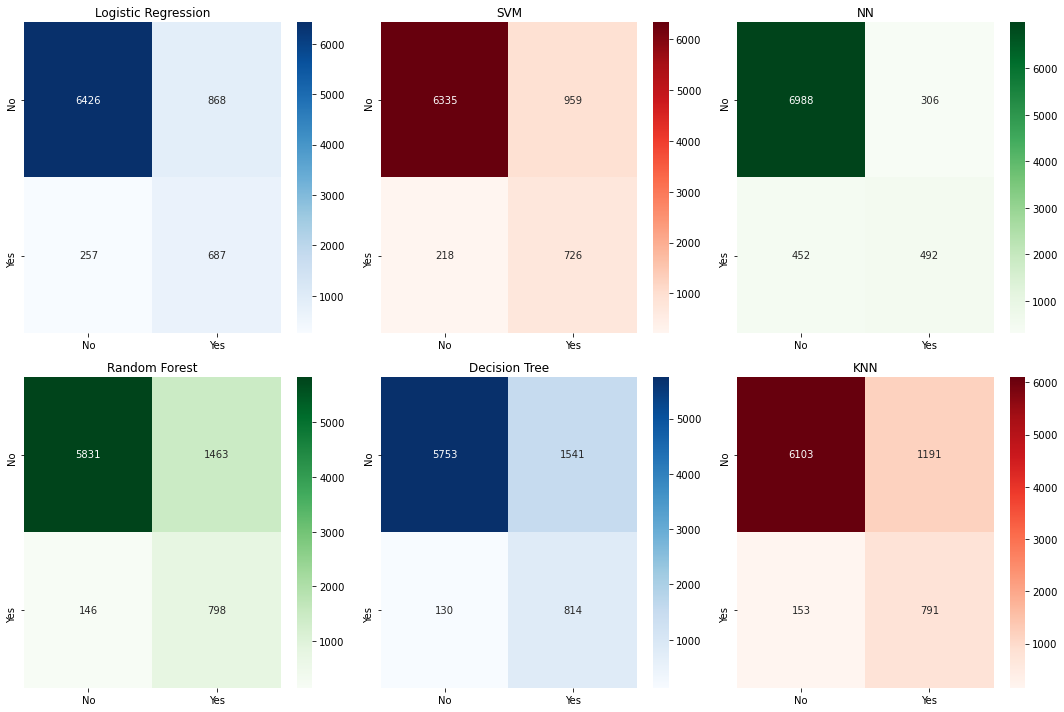

In [78]:
plt.figure(figsize=(15,10))

# 1. Logistic Regression
log_ConfMatrix = confusion_matrix(y_test, logreg.predict(X_test))
plt.subplot(2, 3, 1)
plt.title("Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(log_ConfMatrix, annot=True, cmap="Blues", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(log_ConfMatrix)
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc))
print('F1 Score of logistic regression classifier on test set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 2. K Nearest Neighbor
knn_ConfMatrix = confusion_matrix(y_test, KNN.predict(X_test))
plt.subplot(2, 3, 6)
plt.title("KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(knn_ConfMatrix, annot=True, cmap="Reds", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(knn_ConfMatrix)
print('Recall of KNN on test set: {:.2f}'.format(recall))
print('Accuracy of KNN on test set: {:.2f}'.format(acc))
print('F1 Score of KNN on test set: {:.2f}'.format(F1))


print('-------------------------------------------------------------------------')
# 3. Decision Tree
dt_ConfMatrix = confusion_matrix(y_test, DecisionTree.predict(X_test))
plt.subplot(2, 3, 5)
plt.title("Decision Tree")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(dt_ConfMatrix, annot=True, cmap="Blues", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(dt_ConfMatrix)
print('Recall of decision tree classifier on test set: {:.2f}'.format(recall))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(acc))
print('F1 Score of decision tree classifier on test set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 4. Random Forest
rf_ConfMatrix = confusion_matrix(y_test, RandomForest.predict(X_test))
plt.subplot(2, 3, 4)
plt.title("Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(rf_ConfMatrix, annot=True, cmap="Greens", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(rf_ConfMatrix)
print('Recall of random forest classifier on test set: {:.2f}'.format(recall))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(acc))
print('F1 Score of random forest classifier on test set: {:.2f}'.format(F1))


print('-------------------------------------------------------------------------')
# 5. SVM (Support Vector Mechine)
svm_ConfMatrix = confusion_matrix(y_test, svm.predict(X_test))
plt.subplot(2, 3, 2)
plt.title("SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(svm_ConfMatrix, annot=True, cmap="Reds", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(svm_ConfMatrix)
print('Recall of svm classifier on test set: {:.2f}'.format(recall))
print('Accuracy of svm classifier on test set: {:.2f}'.format(acc))
print('F1 Score of svm classifier on test set: {:.2f}'.format(F1))

print('-------------------------------------------------------------------------')
# 6. NN
nn_ConfMatrix = confusion_matrix(y_test_pca, model.predict_classes(X_test_pca))
plt.subplot(2, 3, 3)
plt.title("NN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(nn_ConfMatrix, annot=True, cmap="Greens", fmt="d"
           ,xticklabels = ['No', 'Yes'] 
           ,yticklabels = ['No', 'Yes'])

recall, acc, F1 = Measures(nn_ConfMatrix)
print('Recall of NN classifier on test set: {:.2f}'.format(recall))
print('Accuracy of NN classifier on test set: {:.2f}'.format(acc))
print('F1 Score of NN classifier on test set: {:.2f}'.format(F1))


plt.tight_layout()